# XGBoost, LightBGBM
- 모듈을 먼저 설치해야 함
- 코랩에서 실행

## 유방암 데이터


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

In [2]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [3]:
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target
features = cancer.feature_names

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train.shape, X_test.shape

((426, 30), (143, 30))

## XGBoost
- 사이킷런 래퍼 방식 (사이킷런의 Estimator를 상속하여 만들었다)
- fit(), predict() 사용 가능
- XGBClassifier, XGBRegressor 제공
- 조기 종료 설정

In [5]:
def view_clf_performances(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("AUC=",roc_auc_score(y_test, y_pred_proba[:,1]))

In [9]:
!conda install xgboost lightgbm -y
# colab에서는 무난히 실행됨
# !mamba install xgboost lightgbm -y

In [10]:
from xgboost import XGBClassifier

evals = [(X_test, y_test)]
xgb_clf = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)
xgb_clf.fit(X_train, y_train, early_stopping_rounds=10, 
                eval_metric="logloss", eval_set=evals, verbose=False)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [11]:
view_clf_performances(xgb_clf, X_test, y_test)

[[49 13]
 [ 2 79]]
              precision    recall  f1-score   support

           0       0.96      0.79      0.87        62
           1       0.86      0.98      0.91        81

    accuracy                           0.90       143
   macro avg       0.91      0.88      0.89       143
weighted avg       0.90      0.90      0.89       143

AUC= 0.9812823576264437


## 특성 중요도 출력

In [12]:
def plot_features_weights(features, weights):
    W = pd.DataFrame({'Weights':weights}, features)
    W.sort_values(by='Weights', ascending=True).plot(kind='barh', color='r', figsize=(8,6))
    plt.gca().legend_ = None

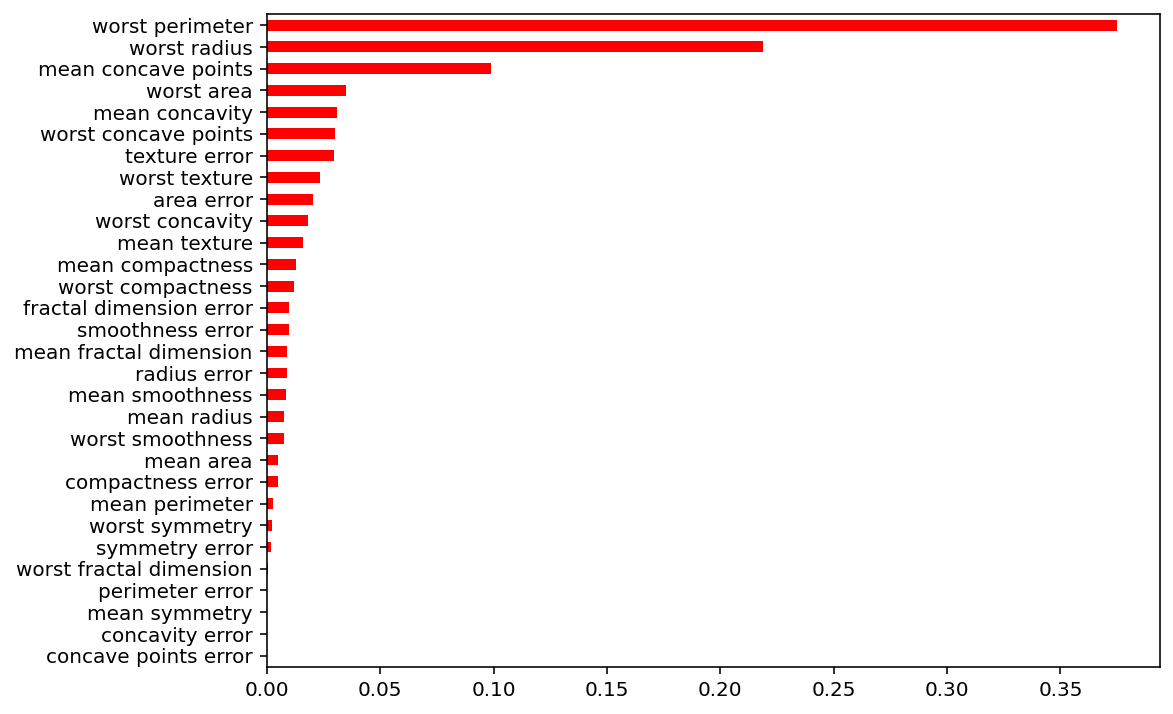

In [14]:
plot_features_weights(features, xgb_clf.feature_importances_)

## 랜덤 포레스트

In [15]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [16]:
view_clf_performances(rfc, X_test, y_test)

[[52 10]
 [ 4 77]]
              precision    recall  f1-score   support

           0       0.93      0.84      0.88        62
           1       0.89      0.95      0.92        81

    accuracy                           0.90       143
   macro avg       0.91      0.89      0.90       143
weighted avg       0.90      0.90      0.90       143

AUC= 0.9835722819593787


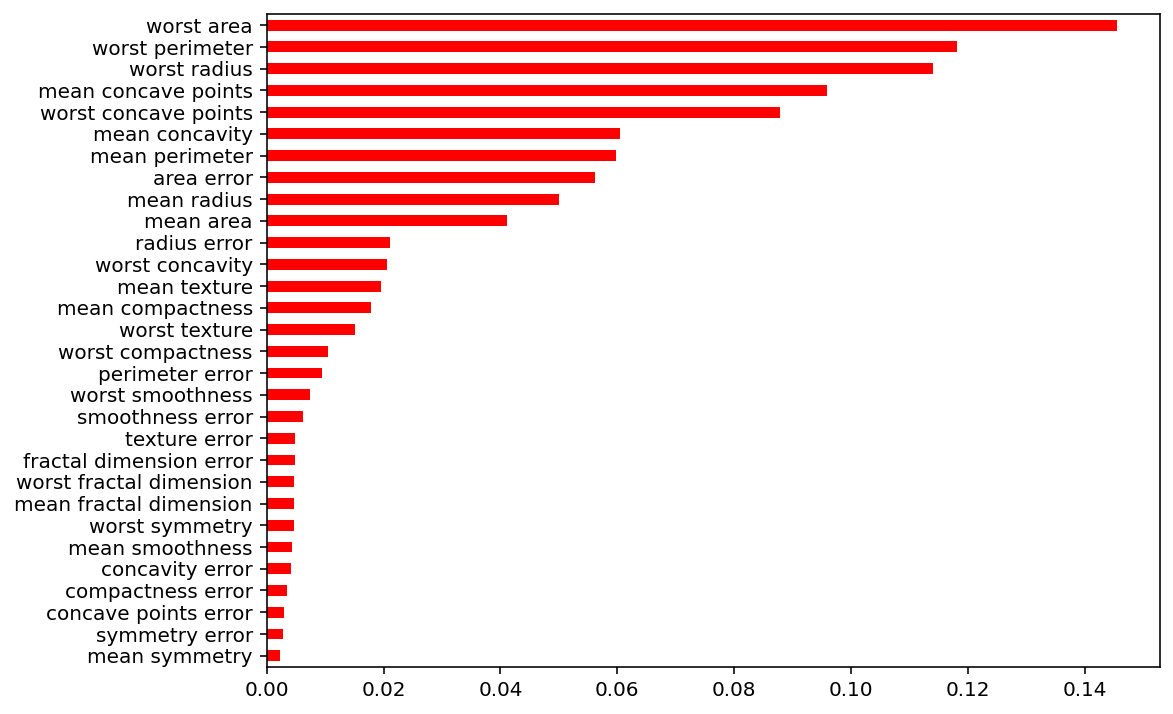

In [17]:
plot_features_weights(features, rfc.feature_importances_)

# LightGBM 
- LightGBM 설치

In [18]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=200)
evals = [(X_test, y_test)]
lgbm_clf.fit(X_train, y_train, early_stopping_rounds=10, 
                 eval_metric="logloss", eval_set=evals, verbose=False)

LGBMClassifier(n_estimators=200)

In [19]:
view_clf_performances(lgbm_clf, X_test, y_test)

[[50 12]
 [ 4 77]]
              precision    recall  f1-score   support

           0       0.93      0.81      0.86        62
           1       0.87      0.95      0.91        81

    accuracy                           0.89       143
   macro avg       0.90      0.88      0.88       143
weighted avg       0.89      0.89      0.89       143

AUC= 0.9790919952210275


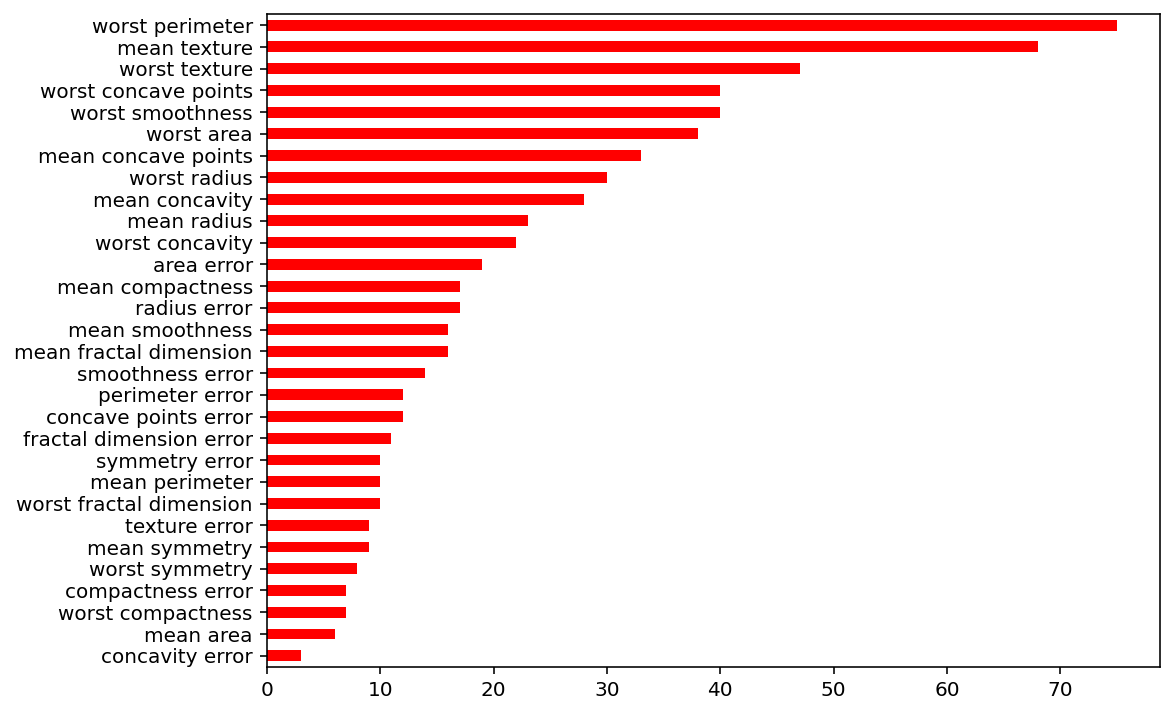

In [20]:
plot_features_weights(features, lgbm_clf.feature_importances_)